In [1]:
import pandas as pd

# Задание 1
Напишите функцию, которая классифицирует фильмы из материалов занятия по следующим правилам:
* оценка 2 и меньше - низкий рейтинг
* оценка 4 и меньше - средний рейтинг
* оценка 4.5 и 5 - высокий рейтинг

Результат классификации запишите в столбец class

In [2]:
ratings = pd.read_csv('ml_latest_small/ratings.csv')

In [3]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [18]:
def get_class(a):
    if a > 4:
        return 'high'
    
    if a > 2:
        return 'medium'
    
    return 'low'

Вариант 1

In [25]:
ratings['class'] = ratings['rating'].apply(get_class)
ratings.head()

,userId,movieId,rating,timestamp,class
0,1,1,4.0,964982703,medium
1,1,3,4.0,964981247,medium
2,1,6,4.0,964982224,medium
3,1,47,5.0,964983815,high
4,1,50,5.0,964982931,high


Вариант 2

In [26]:
df_class = ratings.groupby('movieId').rating.mean().reset_index()
df_class['class'] = df_class['rating'].apply(get_class)
df_class.head()

,movieId,rating,class
0,1,3.920930,medium
1,2,3.431818,medium
2,3,3.259615,medium
3,4,2.357143,medium
4,5,3.071429,medium


# Задание 2
Используем файл keywords.csv.

Необходимо написать гео-классификатор, который каждой строке сможет выставить географическую принадлежность определенному региону. Т. е. если поисковый запрос содержит название города региона, то в столбце ‘region’ пишется название этого региона. Если поисковый запрос не содержит названия города, то ставим ‘undefined’.  

Правила распределения по регионам Центр, Северо-Запад и Дальний Восток:

geo_data = {  
    'Центр': ['москва', 'тула', 'ярославль'],  
    'Северо-Запад': ['петербург', 'псков', 'мурманск'],  
    'Дальний Восток': ['владивосток', 'сахалин', 'хабаровск']  
}

Результат классификации запишите в отдельный столбец region.

In [83]:
keywords = pd.read_csv('keywords.csv')

geo_data = {
    'Центр': ['москва', 'тула', 'ярославль'],
    'Северо-Запад': ['петербург', 'псков', 'мурманск'],
    'Дальний Восток': ['владивосток', 'сахалин', 'хабаровск']
}

In [88]:
def get_geo(a):
    crossing = [i for i in geo_data if len(list(set(geo_data[i]) & set(a.lower().split(' ')))) > 0]
    
    if len(crossing) > 0:
        return ','.join(crossing)
    
    return 'undefined'

In [91]:
keywords['region'] = keywords.keyword.apply(get_geo)
keywords.sort_values('region').tail()

,keyword,shows,region
94336,киносити тула расписание,4062,Центр
83334,верный акции москва каталог сегодня,4485,Центр
49999,avito москва,6876,Центр
48830,сапсан москва санкт петербург,10469,"Центр,Северо-Запад"
52463,москва санкт петербург,9756,"Центр,Северо-Запад"


# Задание 3
Есть мнение, что “раньше снимали настоящее кино, не то что сейчас”. Ваша задача проверить это утверждение, используя файлы с рейтингами фильмов из материалов занятия. Т. е. проверить верно ли, что с ростом года выпуска фильма его средний рейтинг становится ниже.

При этом мы не будем затрагивать субьективные факторы выставления этих рейтингов, а пройдемся по следующему алгоритму:

1. В переменную years запишите список из всех годов с 1950 по 2010.  
2. Напишите функцию production_year, которая каждой строке из названия фильма выставляет год выпуска. Не все названия фильмов содержат год выпуска в одинаковом формате, поэтому используйте следующий алгоритм:
    * для каждой строки пройдите по всем годам списка years
    * если номер года присутствует в названии фильма, то функция возвращает этот год как год выпуска
    * если ни один из номеров года списка years не встретился в названии фильма, то возвращается 1900 год
3. Запишите год выпуска фильма по алгоритму пункта 2 в новый столбец ‘year’  
4. Посчитайте средний рейтинг всех фильмов для каждого значения столбца ‘year’ и отсортируйте результат по убыванию рейтинга

In [103]:
years = [i for i in range(1950,2010)]

movies = pd.read_csv('ml_latest_small/movies.csv')
ratings = pd.read_csv('ml_latest_small/ratings.csv')

In [104]:
def production_year(a):
    for i in years:
        if str(i) in a:
            return i
    return 1900

In [159]:
movies['year'] = movies['title'].apply(production_year)

In [207]:
df = movies.merge(right=ratings, how='inner', on='movieId')
df.groupby('year').mean().sort_values('rating',ascending=False).reset_index()[['year','rating']].head()

,year,rating
0,1957,4.039535
1,1954,4.009191
2,1962,3.969466
3,1952,3.953125
4,1972,3.944293


In [193]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [195]:
import matplotlib.pyplot as plot

In [208]:
arr = df.groupby('year').mean().sort_values('year').reset_index()[['year','rating']]
arr.drop(index=0,inplace=True)

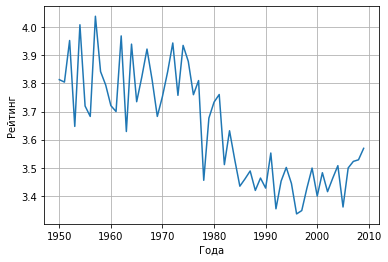

In [209]:
plot.plot(arr.year, arr.rating)
plot.xlabel('Года')
plot.ylabel('Рейтинг')
plot.grid(True)
plot.show()